


# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Open AI Prompt Engineering

---

# Observations et environnement
---

## Environnement

In [2]:
_rs = 42

In [3]:
cd ../..

/Volumes/Geek/Work/Patat


In [4]:
import ast
import importlib
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
tqdm.pandas()

## Données

In [5]:
import patat.util.gsheet

gs = patat.util.gsheet.GoogleSheet()

In [6]:
sheet_id = '1rVgAnv7FwFqWUUmjE72AP_YEmf9v6DaZ-_20jZ6MKTg'
range_name = 'Sélection'

df_obsinfo2307 = gs.read_df(sheet_id,range_name)
df_obsinfo2307

,url_h,url_labelizer,title,comment
0,c13175936764a345ec21bc398fe750a41496078e,https://app.observatoire.info/labelize?url_h=c...,La relation entre la technologie et la religion,très long mais bien formaté
1,0552561b3c46f64febfbc3a77c301f085a98b966,https://app.observatoire.info/labelize?url_h=0...,"Confinement. Les habitants de Brest, Morlaix e...",source visible
2,361a904687dd4b1abb189717de7341ce162d21c7,https://app.observatoire.info/labelize?url_h=3...,La Chine : Le premier marché mondial de Smartp...,ok
3,433b403d386d5eba5dff7d45044cdb0fe7862972,https://app.observatoire.info/labelize?url_h=4...,"Emmanuel à Olivier : « Tiens bon, on les aura ...",source visible
4,3494ad0901a73fc6ceb2f74ac4ac1930af42b363,https://app.observatoire.info/labelize?url_h=3...,"Selon UBS, les « propriétés d’assurance tant d...",ok
...,...,...,...,...
95,d04a526d60fa6d67f61c7abcaf45092b8217a24d,https://app.observatoire.info/labelize?url_h=d...,Loi climat : le gouvernement va exempter Amazo...,bizarre
96,14ed4715949dc7767359674df1a076bb1e0e417b,https://app.observatoire.info/labelize?url_h=1...,Le QI peut-il être augmenté par l’éducation ? ...,donne la source
97,2841a1db742a25419c20d4a56eb65d8c05d92f65,https://app.observatoire.info/labelize?url_h=2...,Secte sexuelle : l’ex-star de Smallville Aliso...,ok
98,7f8a6372ed4084fc88263c03e3b9186f082e2162,https://app.observatoire.info/labelize?url_h=7...,Sacre de Charles III par SAR le Prince Charles...,donne la source


In [7]:
import patat.util.file

filename = 'data/prod/230713-Corpus.pickle'

df_corpus = patat.util.file.pickle_load(filename)

In [8]:
import patat.db.article_db
article_db = patat.db.article_db.ArticleDb()
df_corpus = article_db.df().copy()

In [9]:
import patat.util.text

In [10]:
article_db.get_article_data_h('3494ad0901a73fc6ceb2f74ac4ac1930af42b363')

{'url': 'https://lesakerfrancophone.fr/selon-ubs-les-proprietes-dassurance-tant-de-fois-eprouvees-brillent-plus-que-jamais',
 'site': 'lesakerfrancophone.fr',
 'title': 'Selon UBS, les «\xa0propriétés d’assurance tant de fois éprouvées\xa0» de l’or brillent plus que jamais',
 'article': '',
 'author': 'jmarti',
 'date': 'mars 23, 2022',
 'tags': '[]',
 'paragraphs': ['Par Birch Gold Group − Le 17 février 2022 − Source birchgold.com',
  'Il y a peu, Elliot Smith, de CNBC, a exploré la résilience du prix de l’or au cours des dernières semaines de volatilité sur le marché des actions et les hausses des taux du Trésor. En règle générale, les niveaux de prix de l’or sont fortement affectés par deux forces — les taux des obligations, et le dollar index.',
  'Il y a peu, les taux de Trésor sur une durée de 10 ans ainsi que le dollar index ont monté par rapport à leur position restée basse des mois durant. Si l’on s’en fie à l’historique, une montée des taux pratiqués par le Trésor présente un

In [11]:
df_corpus[df_corpus['url_h']=='3494ad0901a73fc6ceb2f74ac4ac1930af42b363']

,url,site,title,article,author,date,tags,paragraphs,date_iso,abstract,c_count,p_count,url_h,predict_infox
40242,https://lesakerfrancophone.fr/selon-ubs-les-pr...,lesakerfrancophone.fr,"Selon UBS, les « propriétés d’assurance tant d...",NaN,jmarti,"mars 23, 2022",[],[Par Birch Gold Group − Le 17 février 2022 − S...,2022-03-23T10:00:25+01:00,NaN,10070.0,33.0,3494ad0901a73fc6ceb2f74ac4ac1930af42b363,0.5


In [12]:
df_obsinfo2307 = pd.merge(df_obsinfo2307['url_h'],df_corpus)

In [13]:
df_obsinfo2307

,url_h,url,site,title,article,author,date,tags,paragraphs,date_iso,abstract,c_count,p_count,predict_infox
0,c13175936764a345ec21bc398fe750a41496078e,https://lesakerfrancophone.fr/la-relation-entr...,lesakerfrancophone.fr,La relation entre la technologie et la religion,NaN,Le Saker Francophone,"juillet 3, 2022",[],[Par Austin Cline − Le 27 fevrier 2019 − Sourc...,2022-07-03T10:00:27+02:00,NaN,29274.0,66.0,0.5
1,0552561b3c46f64febfbc3a77c301f085a98b966,https://www.breizh-info.com/2021/01/27/157958/...,www.breizh-info.com,"Confinement. Les habitants de Brest, Morlaix e...",NaN,NaN,Le \n\t\t\t\t\t\t\t\t\t\t27 janvier 2021,"['BREST', 'CARHAIX', 'MORLAIX', 'alcool', 'bre...","[Dans le cadre du Dry January, opération comme...",2021-01-27T00:00:00,NaN,2669.0,13.0,0.5
2,361a904687dd4b1abb189717de7341ce162d21c7,https://reseauinternational.net/la-chine-le-pr...,reseauinternational.net,La Chine : Le premier marché mondial de Smartp...,NaN,NaN,NaN,"[""Faits d'actu"", ""Faits d'actu"", ""Faits d'actu...",[Le marché des GSM Chinois a évolué en quelque...,NaN,NaN,2993.0,9.0,0.5
3,433b403d386d5eba5dff7d45044cdb0fe7862972,https://lezarceleurs.blogspot.com/2021/12/emma...,lezarceleurs.blogspot.com,"Emmanuel à Olivier : « Tiens bon, on les aura ...",NaN,NaN,NaN,[],[De : https://lemediaen442.fr/emmanuel-a-olivi...,NaN,NaN,3202.0,10.0,0.5
4,3494ad0901a73fc6ceb2f74ac4ac1930af42b363,https://lesakerfrancophone.fr/selon-ubs-les-pr...,lesakerfrancophone.fr,"Selon UBS, les « propriétés d’assurance tant d...",NaN,jmarti,"mars 23, 2022",[],[Par Birch Gold Group − Le 17 février 2022 − S...,2022-03-23T10:00:25+01:00,NaN,10070.0,33.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,d04a526d60fa6d67f61c7abcaf45092b8217a24d,https://lemediaen442.fr/loi-climat-le-gouverne...,lemediaen442.fr,Loi climat : le gouvernement va exempter Amazo...,NaN,NaN,22 juin 2021,"['Mot-clés : amazon', 'Posté dans Économie, En...",[La majorité LREM s’apprête une fois de plus à...,2021-06-22T13:35:07+02:00,NaN,2766.0,10.0,0.5
96,14ed4715949dc7767359674df1a076bb1e0e417b,https://www.breizh-info.com/2017/11/10/81481/q...,www.breizh-info.com,Le QI peut-il être augmenté par l’éducation ? ...,NaN,NaN,Le \n\t\t\t\t\t\t\t\t\t\t10 novembre 2017,"['Santé', 'Intelligence', 'Intelligence humain...",[10/11/2017 – 08h00 Édimbourg (Breizh-Info.com...,2017-11-10T00:00:00,NaN,3885.0,10.0,0.5
97,2841a1db742a25419c20d4a56eb65d8c05d92f65,https://lesmoutonsrebelles.com/secte-sexuelle-...,lesmoutonsrebelles.com,Secte sexuelle : l’ex-star de Smallville Aliso...,NaN,NaN,NaN,[],"[Ce mercredi 15 septembre, le site américain T...",NaN,NaN,1903.0,5.0,0.5
98,7f8a6372ed4084fc88263c03e3b9186f082e2162,https://lesalonbeige.fr/sacre-de-charles-iii-p...,lesalonbeige.fr,Sacre de Charles III par SAR le Prince Charles...,"Cet article est une tribune libre, non rédigée...",Par aquart61,9 mai 2023,[Tribune libre],"[Cet article est une tribune libre, non rédigé...",2023-05-09T08:35:20+02:00,,NaN,NaN,0.5


## Constitution textes

In [14]:
import patat.imp.parser

In [15]:
parser = patat.imp.parser.Parser()

In [16]:
def make_text(row):
    return parser.text_from_data(row['title'], row['abstract'], row['paragraphs'])
    

In [17]:
df_obsinfo2307['text']=df_obsinfo2307.apply(make_text,axis=1)

In [18]:
df_obsinfo2307

,url_h,url,site,title,article,author,date,tags,paragraphs,date_iso,abstract,c_count,p_count,predict_infox,text
0,c13175936764a345ec21bc398fe750a41496078e,https://lesakerfrancophone.fr/la-relation-entr...,lesakerfrancophone.fr,La relation entre la technologie et la religion,NaN,Le Saker Francophone,"juillet 3, 2022",[],[Par Austin Cline − Le 27 fevrier 2019 − Sourc...,2022-07-03T10:00:27+02:00,NaN,29274.0,66.0,0.5,La relation entre la technologie et la religio...
1,0552561b3c46f64febfbc3a77c301f085a98b966,https://www.breizh-info.com/2021/01/27/157958/...,www.breizh-info.com,"Confinement. Les habitants de Brest, Morlaix e...",NaN,NaN,Le \n\t\t\t\t\t\t\t\t\t\t27 janvier 2021,"['BREST', 'CARHAIX', 'MORLAIX', 'alcool', 'bre...","[Dans le cadre du Dry January, opération comme...",2021-01-27T00:00:00,NaN,2669.0,13.0,0.5,"Confinement. Les habitants de Brest, Morlaix e..."
2,361a904687dd4b1abb189717de7341ce162d21c7,https://reseauinternational.net/la-chine-le-pr...,reseauinternational.net,La Chine : Le premier marché mondial de Smartp...,NaN,NaN,NaN,"[""Faits d'actu"", ""Faits d'actu"", ""Faits d'actu...",[Le marché des GSM Chinois a évolué en quelque...,NaN,NaN,2993.0,9.0,0.5,La Chine : Le premier marché mondial de Smartp...
3,433b403d386d5eba5dff7d45044cdb0fe7862972,https://lezarceleurs.blogspot.com/2021/12/emma...,lezarceleurs.blogspot.com,"Emmanuel à Olivier : « Tiens bon, on les aura ...",NaN,NaN,NaN,[],[De : https://lemediaen442.fr/emmanuel-a-olivi...,NaN,NaN,3202.0,10.0,0.5,"Emmanuel à Olivier : « Tiens bon, on les aura ..."
4,3494ad0901a73fc6ceb2f74ac4ac1930af42b363,https://lesakerfrancophone.fr/selon-ubs-les-pr...,lesakerfrancophone.fr,"Selon UBS, les « propriétés d’assurance tant d...",NaN,jmarti,"mars 23, 2022",[],[Par Birch Gold Group − Le 17 février 2022 − S...,2022-03-23T10:00:25+01:00,NaN,10070.0,33.0,0.5,"Selon UBS, les « propriétés d’assurance tant d..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,d04a526d60fa6d67f61c7abcaf45092b8217a24d,https://lemediaen442.fr/loi-climat-le-gouverne...,lemediaen442.fr,Loi climat : le gouvernement va exempter Amazo...,NaN,NaN,22 juin 2021,"['Mot-clés : amazon', 'Posté dans Économie, En...",[La majorité LREM s’apprête une fois de plus à...,2021-06-22T13:35:07+02:00,NaN,2766.0,10.0,0.5,Loi climat : le gouvernement va exempter Amazo...
96,14ed4715949dc7767359674df1a076bb1e0e417b,https://www.breizh-info.com/2017/11/10/81481/q...,www.breizh-info.com,Le QI peut-il être augmenté par l’éducation ? ...,NaN,NaN,Le \n\t\t\t\t\t\t\t\t\t\t10 novembre 2017,"['Santé', 'Intelligence', 'Intelligence humain...",[10/11/2017 – 08h00 Édimbourg (Breizh-Info.com...,2017-11-10T00:00:00,NaN,3885.0,10.0,0.5,Le QI peut-il être augmenté par l’éducation ? ...
97,2841a1db742a25419c20d4a56eb65d8c05d92f65,https://lesmoutonsrebelles.com/secte-sexuelle-...,lesmoutonsrebelles.com,Secte sexuelle : l’ex-star de Smallville Aliso...,NaN,NaN,NaN,[],"[Ce mercredi 15 septembre, le site américain T...",NaN,NaN,1903.0,5.0,0.5,Secte sexuelle : l’ex-star de Smallville Aliso...
98,7f8a6372ed4084fc88263c03e3b9186f082e2162,https://lesalonbeige.fr/sacre-de-charles-iii-p...,lesalonbeige.fr,Sacre de Charles III par SAR le Prince Charles...,"Cet article est une tribune libre, non rédigée...",Par aquart61,9 mai 2023,[Tribune libre],"[Cet article est une tribune libre, non rédigé...",2023-05-09T08:35:20+02:00,,NaN,NaN,0.5,Sacre de Charles III par SAR le Prince Charles...


## Reduction des textes à 13 paragraphes

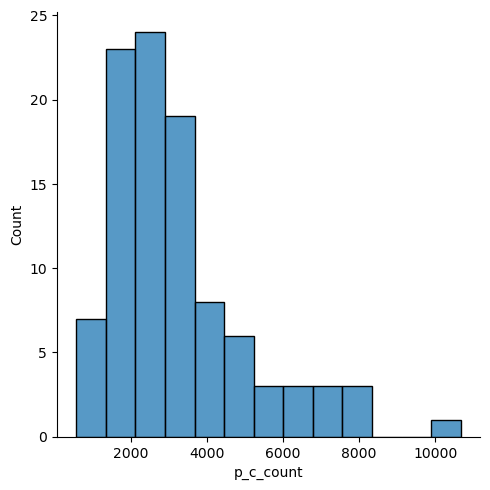

In [165]:
p_count = 13
def partial_texts(text):
    parags = text.split('\n')
    result='\n'.join(parags[:p_count])
    return result

df_obsinfo2307['p_text'] = df_obsinfo2307['text'].apply(partial_texts)

df_obsinfo2307['p_c_count']=df_obsinfo2307['p_text'].apply(len)

sns.displot(df_obsinfo2307['p_c_count'])

# Experience
---

## Test Gpt class

In [137]:
import patat.model.gpt

In [138]:
importlib.reload(patat.model.gpt)

<module 'patat.model.gpt' from '/Volumes/Geek/Work/Patat/patat/model/gpt.py'>

In [139]:
gpt = patat.model.gpt.Gpt()

In [140]:
gpt.get_embeddings('Ceci est une première phrase')

[0.0016411488177254796,
 -0.0010852506384253502,
 -0.00856333039700985,
 -0.013241618871688843,
 -0.006602071691304445,
 0.044471852481365204,
 -0.020362112671136856,
 -0.012460863217711449,
 -0.0042316969484090805,
 -0.019687538966536522,
 0.02103668637573719,
 0.03625205531716347,
 -0.0185882356017828,
 -0.011486480012536049,
 0.005518382415175438,
 -0.018063567578792572,
 0.054015811532735825,
 -0.002133025089278817,
 0.00968137290328741,
 0.014315939508378506,
 -1.6652058548061177e-05,
 -0.012054869905114174,
 0.0169642623513937,
 -0.010799414478242397,
 -0.01121789962053299,
 -0.014028620906174183,
 -0.0007729483186267316,
 -0.008394686505198479,
 0.01425347849726677,
 -0.018962997943162918,
 -0.004809455946087837,
 -0.008575822226703167,
 0.009206673130393028,
 -0.02298545278608799,
 -0.007420303765684366,
 0.0007108782301656902,
 -0.0004395655414555222,
 1.7359618141199462e-05,
 -0.004753241781145334,
 -0.006570841185748577,
 0.02813219465315342,
 0.015415243804454803,
 0.019787

## Tests de prompts

In [147]:
def ask_gpt_completion(prompt):
    response = openai.Completion.create(
            engine="text-davinci-003",
            prompt=prompt,
            temperature=0,
            max_tokens=512,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0,
        )
    return response['choices'][0]['text']


In [160]:
def ask_gpt_chat(prompt, system_context=''):
    messages = []
    if system_context :
        messages.append({"role": "system", "content": system_context})
    question = {}
    question['role'] = 'user'
    question['content'] = prompt
    messages.append(question)
    response =  openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=messages,
            temperature=0,
            max_tokens=512,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0,
        )
    return response['choices'][0]['message']['content']

In [161]:
prompt = 'Raconte moi une blague'

In [162]:
ask_gpt_chat(prompt)

'Bien sûr ! Voici une blague pour vous :\n\nPourquoi les plongeurs plongent-ils toujours en arrière et jamais en avant ?\n\nParce que sinon ils tombent dans le bateau !'

In [106]:
consigne = """
Nous allons te poser des questions dans le cadre d'une expérience où tes réponses seront comparées à des réponses humaines.
Il s'agit de classifer des textes selon une liste de labels prédéfinis.
Pour chacun tes labels, tu répondras 1 pour oui ou 0 pour non.
Les labels sont les suivants :
- infox : contient au moins un fait qui est décrit ou insinué, et qui est faux ou dont la description est exagérée
- lieux, dates et personnes : Mentionne au moins un lieu, une date ou une personne 
- faits : Décrit au moins un fait (un état de chose ou événement, qui peut être vrai ou faux)
- opinions : Formule au moins une opinion 
- subjectif : L’article présente plus des opinions que des faits, 
- propos rapporté : Le contenu de l'article est rapporté par une autre personne ou une autre source, donc l’article est “indirect”, 
- sources citées : Une source d'information (identifiable) est citée, pour un fait au moins
- fausse nouvelle : Un fait décrit dans l’article est faux 
- insinuations : L'article laisse à penser un fait sans le dire explicitement 
- exagération : L’article exagère un fait réel, 
- titre décalé : Le titre est trompeur et ne reflète pas correctement le contenu de l’article
"""

In [170]:
def gpt35_annotate(text):
    prompt = f'{consigne}\nVoici le texte à analyser :\n{text}'
    return ask_gpt_chat(prompt)

## Annotation par gpt-3.5

In [ ]:
gpt35_text = []

In [180]:
for index,row in df_obsinfo2307.iterrows():
    if index>89:
        print(index,row['title'])
        gpt35_text.append({
            'url_h':row['url_h'],
            'title':row['title'],
            'gpt35-labels': gpt35_annotate(row['p_text']),
        })

90 Ursula von der Leyen, non-élue et intouchable
91 Tous au dîner des traîtres
92 Rudolph Giuliani a autorisé la publication de la déclaration suivante concernant le raid du FBI chez lui le 28 avril
93 24 juillet : nouvelles manifestations nationales contre le passe sanitaire
94 La candidature de Zemmour pourrait briser le cordon sanitaire du « front républicain »
95 Loi climat : le gouvernement va exempter Amazon et le e-commerce des fortes contraintes de la future loi
96 Le QI peut-il être augmenté par l’éducation ? Une étude relance le débat
97 Secte sexuelle : l’ex-star de Smallville Alison Mack incarcérée, elle s’est constituée prisonnière avec 2 semaines d’avance
98 Sacre de Charles III par SAR le Prince Charles-Emmanuel de Bourbon-Parme
99 Bac 2019: appel à poursuivre la grève jusqu'au brevet


In [181]:
df_gpt = pd.DataFrame(gpt35_text)

In [230]:
def split_gpt_response(text):
    text = normalize_gpt_text(text)
    lines = text.split('\n')
    response = {}
    for line in lines:
        items = line.split(':')
        if len(items)==2:
            if items[1]!='':
                response[items[0].strip()]=float(items[1].strip(' '))
    return response

In [231]:
gpt_labels = df_gpt['gpt35-labels'].apply(split_gpt_response)

In [232]:
def normalize_gpt_text(text):
    text = text.replace('Voici les réponses pour chaque label :\n\n- ','')
    text = text.replace('les informations fournies, voici les réponses aux différentes questions','')  
    text = text.replace('-','')
    return text

In [233]:
df_obs_gpt = pd.concat([df_obsinfo2307,pd.DataFrame(list(gpt_labels))],axis=1)

In [239]:
df_obs_gpt.to_csv('data/tmp/230718-Gpt.csv')

# Sauvegarde des résultats
---

# Conclusions
---

# Bricolages
---

In [49]:
import os
import openai

In [50]:
openai.organization = os.getenv("OPENAI_ORG_ID")
openai.api_key = os.getenv("OPENAI_API_KEY")


In [145]:
model_list = openai.Model.list()

In [146]:
[model['id'] for model in model_list['data']]

['whisper-1',
 'babbage',
 'text-davinci-003',
 'davinci',
 'text-davinci-edit-001',
 'babbage-code-search-code',
 'text-similarity-babbage-001',
 'code-davinci-edit-001',
 'text-davinci-001',
 'ada',
 'babbage-code-search-text',
 'babbage-similarity',
 'gpt-3.5-turbo-16k-0613',
 'code-search-babbage-text-001',
 'text-curie-001',
 'gpt-3.5-turbo-0301',
 'gpt-3.5-turbo-16k',
 'code-search-babbage-code-001',
 'text-ada-001',
 'text-similarity-ada-001',
 'curie-instruct-beta',
 'ada-code-search-code',
 'ada-similarity',
 'code-search-ada-text-001',
 'text-search-ada-query-001',
 'davinci-search-document',
 'ada-code-search-text',
 'text-search-ada-doc-001',
 'davinci-instruct-beta',
 'text-similarity-curie-001',
 'code-search-ada-code-001',
 'ada-search-query',
 'text-search-davinci-query-001',
 'curie-search-query',
 'gpt-3.5-turbo-0613',
 'text-embedding-ada-002',
 'davinci-search-query',
 'babbage-search-document',
 'ada-search-document',
 'gpt-3.5-turbo',
 'text-search-curie-query-001